In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the dataset
df = pd.read_csv("/content/drive/MyDrive/FYP/FYP dataset/E Commerce Dataset.csv")
OnlineRetail = df.copy() #Taking a copy of the data

In [4]:
#Retrieving the first 10 rows
OnlineRetail.head(10)

,Unnamed: 0,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,...,Laptop & Accessory,589314,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,...,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,...,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,...,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,...,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,8,50009,1,-10000.0,Phone,3,9.0,E wallet,Male,NaN,...,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,...,Mobile,3,NaN,2,0,12.0,1.0,1.0,1.0,122.93


In [5]:
OnlineRetail.info() #Figuring out columns' data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16890 entries, 0 to 16889
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   16890 non-null  int64  
 1   CustomerID                   16890 non-null  int64  
 2   Churn                        16890 non-null  int64  
 3   Tenure                       16107 non-null  float64
 4   PreferredLoginDevice         16890 non-null  object 
 5   CityTier                     16890 non-null  int64  
 6   WarehouseToHome              15555 non-null  float64
 7   PreferredPaymentMode         16290 non-null  object 
 8   Gender                       16890 non-null  object 
 9   HourSpendOnApp               16125 non-null  float64
 10  NumberOfDeviceRegistered     16290 non-null  float64
 11  PreferedOrderCat             16890 non-null  object 
 12  SatisfactionScore            16890 non-null  int64  
 13  MaritalStatus   

In [6]:
OnlineRetail.describe() #Quick Descriptive Summary (Numeric Data Type based)

,Unnamed: 0,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,16890.000000,16890.000000,16890.000000,16107.000000,16890.000000,15555.000000,16125.000000,16290.000000,16890.000000,16890.000000,16890.000000,16095.000000,16122.000000,16116.000000,15969.000000,16890.000000
mean,8444.500000,52815.500000,0.168384,-176.226485,1.654707,15.671553,2.931535,3.686740,10470.403552,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,4875.867359,1625.289097,0.374218,1353.431459,0.915335,8.556625,0.721881,1.024065,77841.558859,2.583433,0.451381,3.675257,1.894504,2.939497,3.654204,49.204123
min,0.000000,50001.000000,0.000000,-10000.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,4222.250000,51408.000000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,8444.500000,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,12666.750000,54223.000000,0.000000,16.000000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.400000
max,16889.000000,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,589314.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [7]:
OnlineRetail.describe(include='object') #Quick Descriptive Summary (Object Data Type based)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,16890,16290,16890,16890,16290
unique,4,7,4,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,8205,6687,9561,6150,8637


Exploratory Data Analysis

In [8]:
#Making Sure there are no inconsistent columns
OnlineRetail.columns

Index(['Unnamed: 0', 'CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice',
       'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [9]:
#Dropping 'Unnamed: 0' Column
OnlineRetail.drop('Unnamed: 0', axis = 1, inplace = True)

In [10]:
OnlineRetail.shape #Figuring out the shape of the data

(16890, 20)

In [11]:
OnlineRetail.info() #Figuring out columns' data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16890 entries, 0 to 16889
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   16890 non-null  int64  
 1   Churn                        16890 non-null  int64  
 2   Tenure                       16107 non-null  float64
 3   PreferredLoginDevice         16890 non-null  object 
 4   CityTier                     16890 non-null  int64  
 5   WarehouseToHome              15555 non-null  float64
 6   PreferredPaymentMode         16290 non-null  object 
 7   Gender                       16890 non-null  object 
 8   HourSpendOnApp               16125 non-null  float64
 9   NumberOfDeviceRegistered     16290 non-null  float64
 10  PreferedOrderCat             16890 non-null  object 
 11  SatisfactionScore            16890 non-null  int64  
 12  MaritalStatus                16290 non-null  object 
 13  NumberOfAddress 

Figuring out null values

In [12]:
OnlineRetail.isnull().sum() #Figuring out the number of null values in each column

CustomerID                        0
Churn                             0
Tenure                          783
PreferredLoginDevice              0
CityTier                          0
WarehouseToHome                1335
PreferredPaymentMode            600
Gender                            0
HourSpendOnApp                  765
NumberOfDeviceRegistered        600
PreferedOrderCat                  0
SatisfactionScore                 0
MaritalStatus                   600
NumberOfAddress                   0
Complain                          0
OrderAmountHikeFromlastYear     795
CouponUsed                      768
OrderCount                      774
DaySinceLastOrder               921
CashbackAmount                    0
dtype: int64

Figuring out duplicate values

In [13]:
OnlineRetail.pivot_table(index=['CustomerID'], aggfunc ='size') #Figuring Out if there are any duplicate value

CustomerID
50001    3
50002    3
50003    3
50004    3
50005    3
        ..
55626    3
55627    3
55628    3
55629    3
55630    3
Length: 5630, dtype: int64

In [14]:
OnlineRetail.duplicated().sum() #Figuring out if there are any duplicate values (on row level)

11260

Data cleansing

In [15]:
#Handling duplicate values
OnlineRetail.drop_duplicates(keep='first', inplace = True) #Removing duplicates

In [16]:
OnlineRetail.duplicated().sum() #Validating the changes

0

In [17]:
OnlineRetail.shape #Revalidating the shape of the dataset

(5630, 20)

Handling / Figuring out outliers

In [18]:
#column: tenure
OnlineRetail['Tenure'].sort_values(ascending=True).value_counts() #Figuring out if there are extreme values

Tenure
 1.0        676
 0.0        493
 8.0        257
 9.0        240
 7.0        216
 10.0       211
 5.0        201
 4.0        200
 3.0        192
 11.0       189
 6.0        182
 13.0       177
 12.0       174
 14.0       174
 2.0        166
 15.0       158
 16.0       148
 19.0       137
 18.0       120
 20.0       107
 17.0       105
-10000.0    100
 23.0        89
 21.0        83
 22.0        76
 24.0        75
 28.0        70
 30.0        66
 27.0        64
 26.0        60
 25.0        57
 29.0        54
 31.0        48
 50.0         1
 51.0         1
 60.0         1
 61.0         1
Name: count, dtype: int64

In [19]:
#Tenure column has extrem unlogical value below 0 and outliers starting from a value of 50.0+
OnlineRetail = OnlineRetail[OnlineRetail['Tenure'] < 50.0] #Excluding values above 50.0

In [20]:
OnlineRetail['Tenure'].replace(-10000, np.NaN, inplace=True) #Replacing -10000 with Null value

<ipython-input-20-14d801e34ad4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OnlineRetail['Tenure'].replace(-10000, np.NaN, inplace=True) #Replacing -10000 with Null value


In [21]:
OnlineRetail['Tenure'].unique() #Validating the changes

array([ 4.,  0., nan, 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2., 30.,
       13.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 31.])

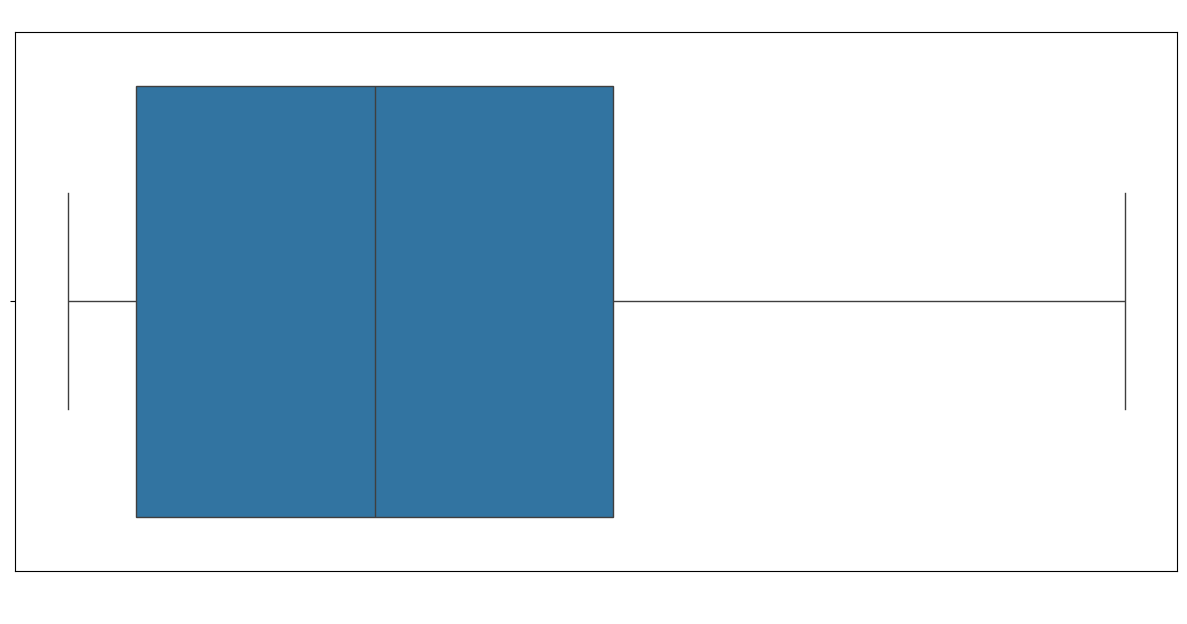

In [22]:
#Further Tenure column outliers configuration
plt.figure(figsize=(15,7))
Tenure_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['Tenure'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('Tenure Values', color='white')
Tenure_ax.set_title('Finding outliers in Tenure column',color= 'white')
plt.show()

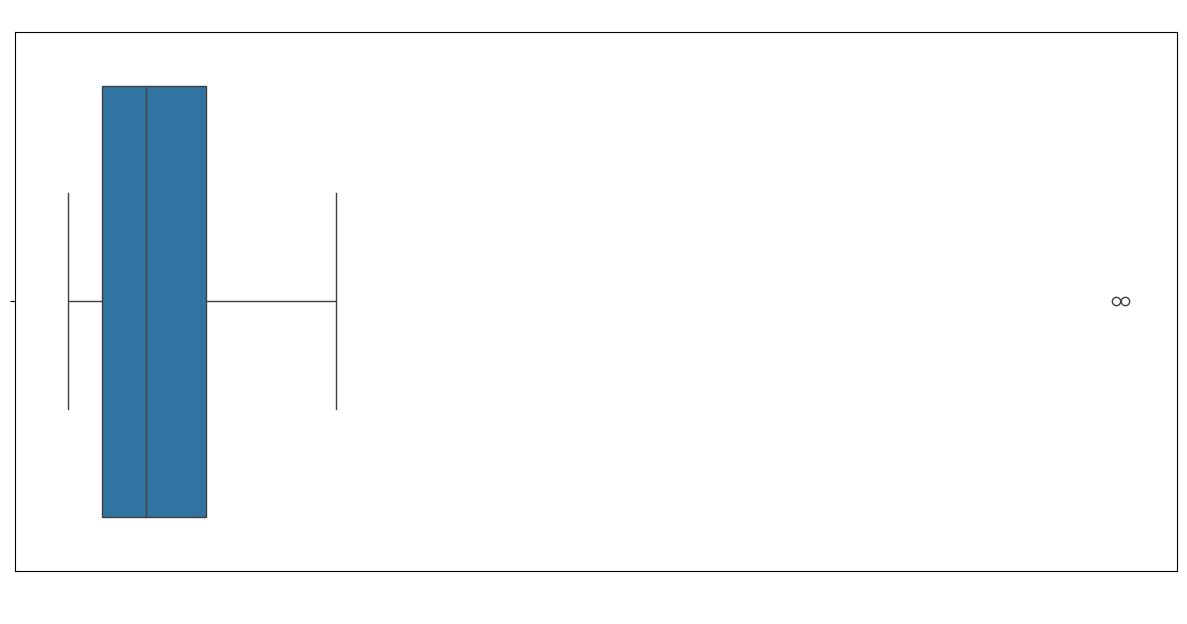

In [23]:
#column: WarehouseToHome
#Detecting Outliers WarehouseToHome Column
plt.figure(figsize=(15,7))
WarehouseToHome_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['WarehouseToHome'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('WarehouseToHome Values', color='white')
WarehouseToHome_ax.set_title('Finding outliers in WarehouseToHome column',color= 'white')
plt.show()

In [24]:
OnlineRetail['WarehouseToHome'].value_counts()

WarehouseToHome
9.0      519
8.0      404
7.0      358
16.0     288
14.0     274
10.0     259
15.0     258
6.0      247
13.0     229
11.0     216
17.0     207
12.0     200
22.0      96
31.0      95
32.0      92
35.0      91
18.0      86
30.0      85
25.0      84
23.0      83
24.0      82
26.0      78
21.0      78
29.0      73
27.0      72
20.0      67
19.0      65
33.0      64
34.0      61
28.0      60
36.0      48
5.0        8
126.0      1
127.0      1
Name: count, dtype: int64

In [25]:
#Column WarehouseToHome has outliers on values 126.0 and 127.0 and Potentially 5.0
OnlineRetail = OnlineRetail[OnlineRetail['WarehouseToHome'] < 126.0]

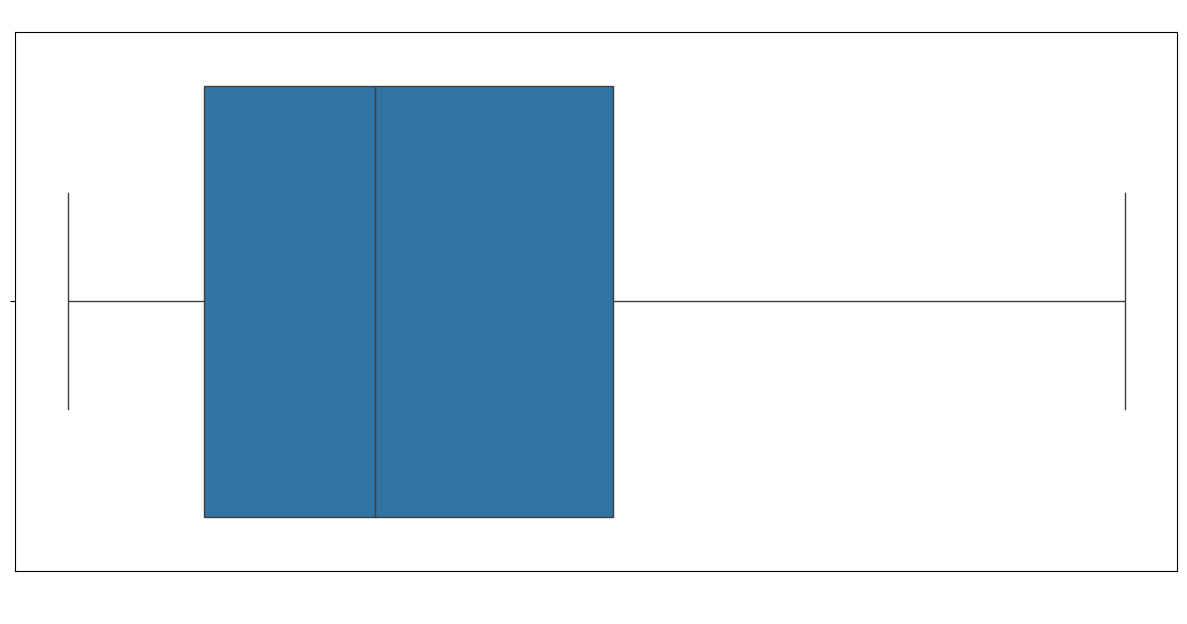

In [26]:
#Validating the changes
plt.figure(figsize=(15,7))
WarehouseToHome_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['WarehouseToHome'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('WarehouseToHome Values', color='white')
WarehouseToHome_ax.set_title('Finding outliers in WarehouseToHome column',color= 'white')
plt.show()

In [27]:
#column: SatisfactionScore
OnlineRetail['SatisfactionScore'].value_counts() #Figuring out if there's extreme values

SatisfactionScore
3         1458
1         1009
5          949
4          912
2          510
589314      89
Name: count, dtype: int64

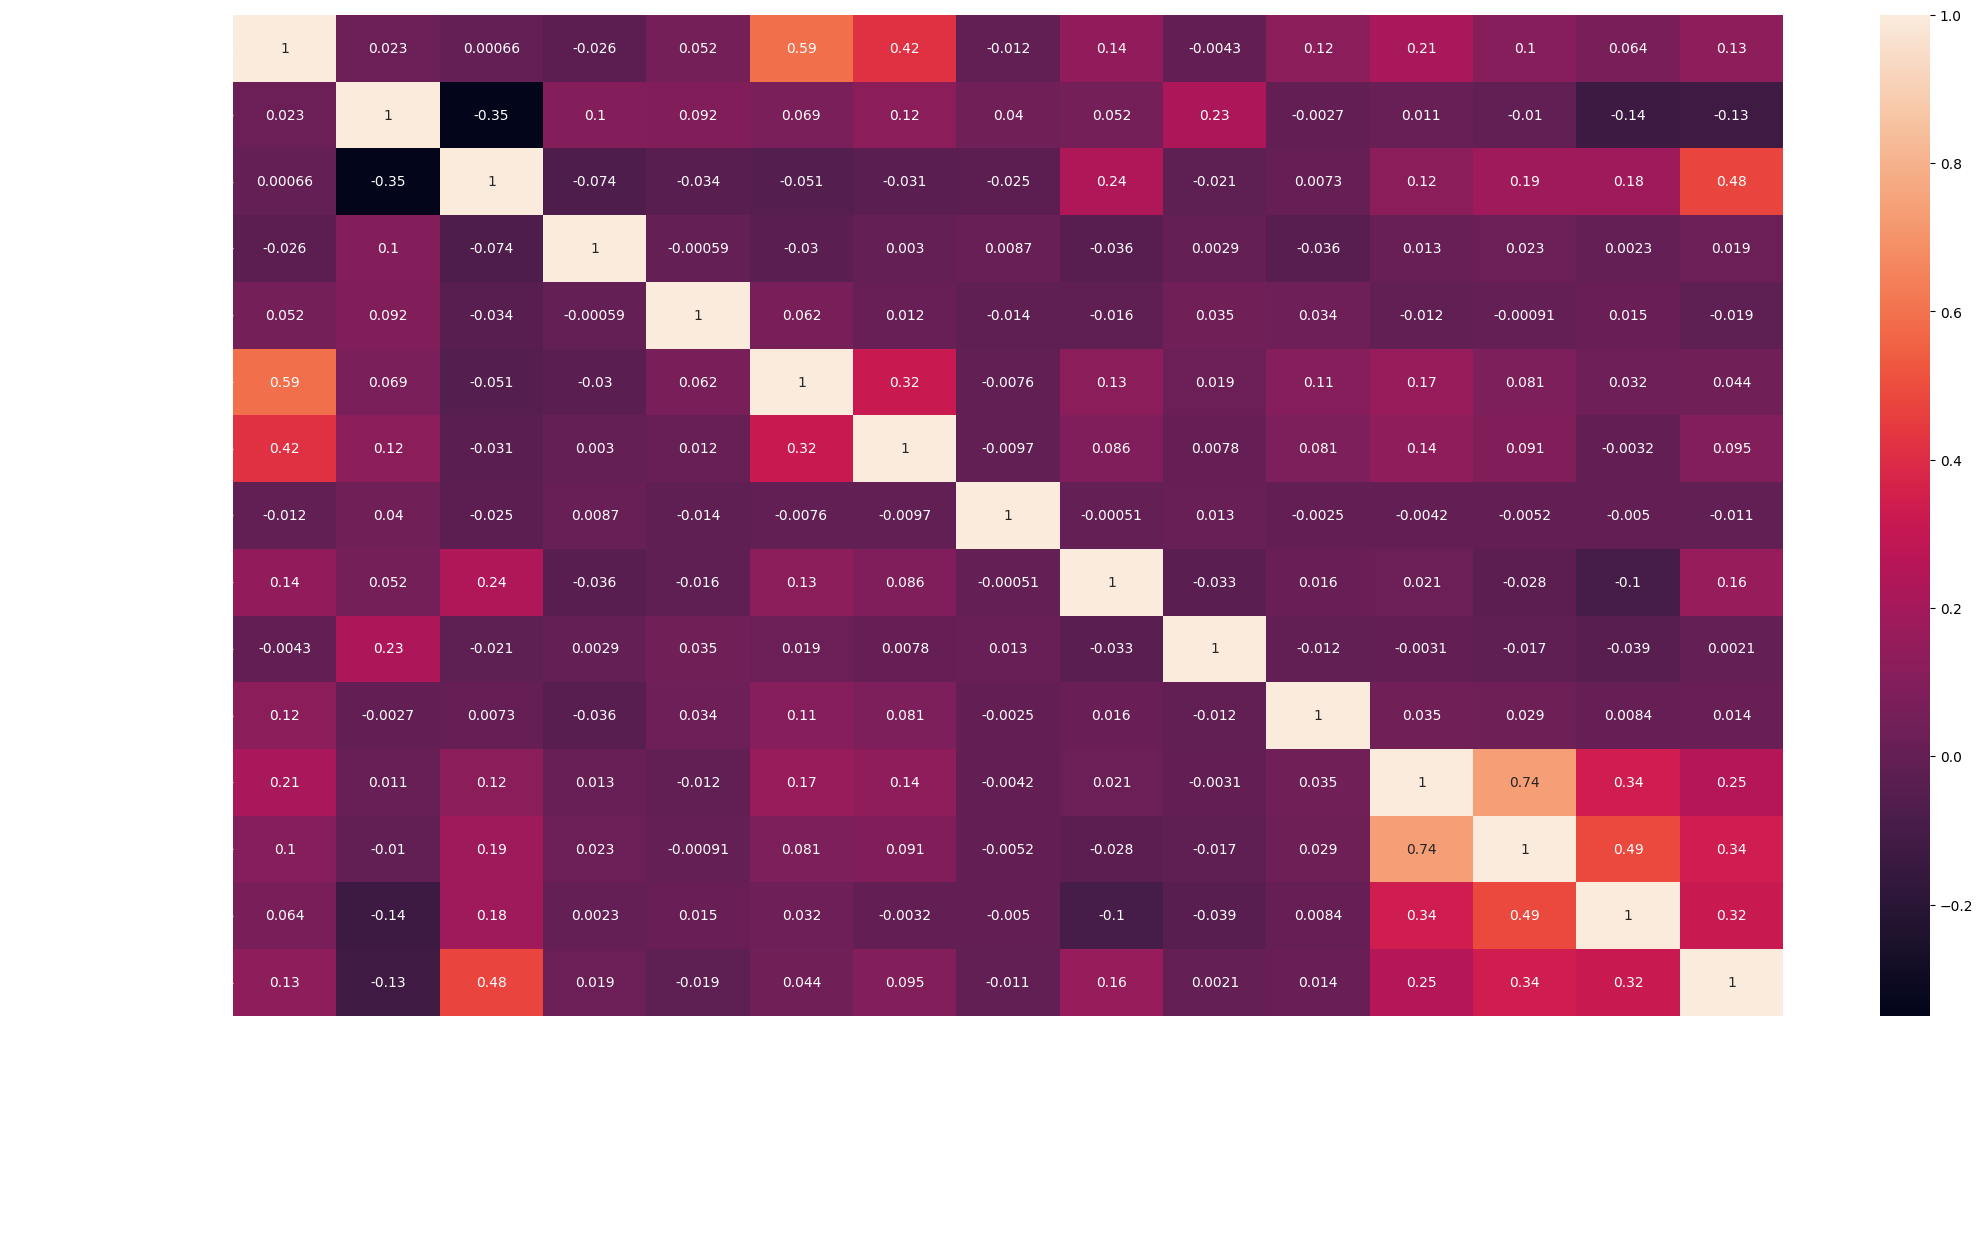

In [28]:
# Selecting only numeric columns
numeric_columns = OnlineRetail.select_dtypes(include=[np.number])

# Plotting the correlation heatmap
plt.figure(figsize=(25, 13))
sns.heatmap(data=numeric_columns.corr(), annot=True)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

In [29]:
#Since Satisfaction Score has a correlation with Churn Column, Let's group the Satisfaction Score of 589314.0 with the churn rate to figure out how to handle the value accurately
Satisfaction_Handling = OnlineRetail[['Churn','SatisfactionScore']]
Satisfaction_Handling = Satisfaction_Handling[Satisfaction_Handling['SatisfactionScore'] == 589314.0]
Grouped = Satisfaction_Handling.groupby('Churn')['SatisfactionScore'].count()
Grouped

Churn
0    66
1    23
Name: SatisfactionScore, dtype: int64

In [30]:
#Figuring out the mean of SatisfactionScore Column in each Churn Category (1,0)
Sat_Mean = OnlineRetail[['Churn','SatisfactionScore']]
Sat_Mean_1 = Sat_Mean[Sat_Mean['Churn'] == 1]
Positive_Sat_Mean = np.round(Sat_Mean_1['SatisfactionScore'].mean(), decimals=3)
Sat_Mean_0 = Sat_Mean[Sat_Mean['Churn'] == 0]
Negative_Sat_Mean = np.round(Sat_Mean_0['SatisfactionScore'].mean(), decimals=3)

In [31]:
print(Positive_Sat_Mean)
print(Negative_Sat_Mean)

18027.505
9319.056


In [32]:
#Finally, The best solution is to remove the 589314 values
OnlineRetail = OnlineRetail[OnlineRetail['SatisfactionScore'] != 589314]

In [33]:
OnlineRetail['SatisfactionScore'].value_counts() #Validating the changes

SatisfactionScore
3    1458
1    1009
5     949
4     912
2     510
Name: count, dtype: int64

In [34]:
#column: NumberOfAddress
OnlineRetail['NumberOfAddress'].value_counts() #Figuring out if there are extreme values

NumberOfAddress
3     1179
2     1056
4      520
5      500
6      347
1      292
8      256
9      211
7      209
10     178
11      87
21       1
20       1
22       1
Name: count, dtype: int64

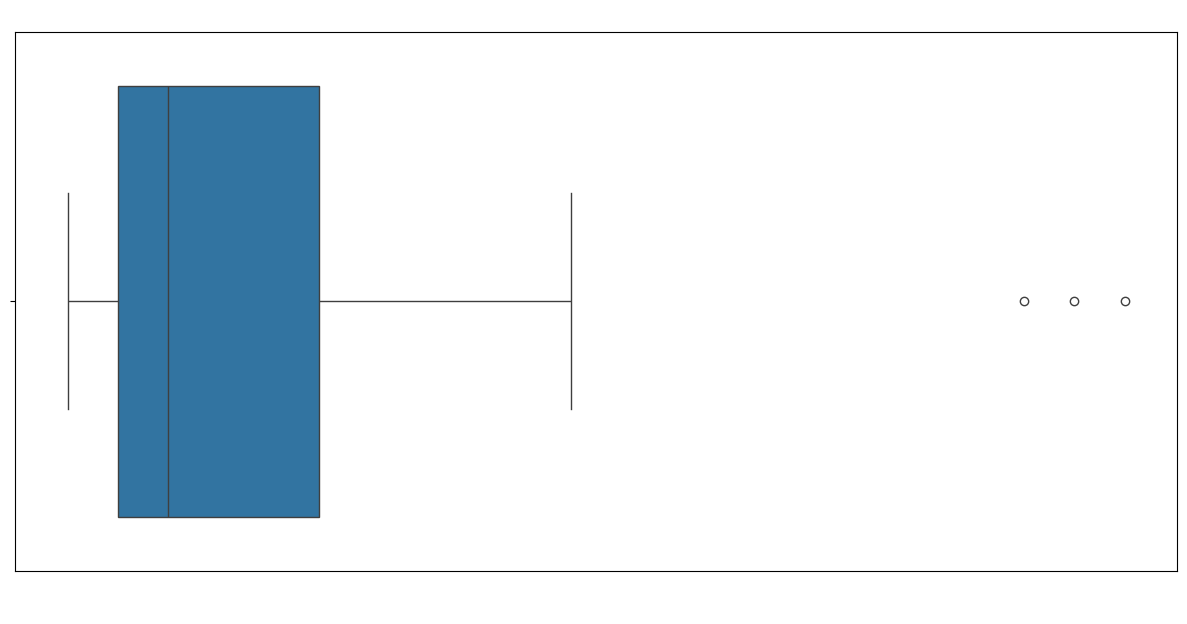

In [35]:
#Detecting Outliers NumberOfAddress Column
plt.figure(figsize=(15,7))
NumberOfAddress_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['NumberOfAddress'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('NumberOfAddress Values', color='white')
NumberOfAddress_ax.set_title('Finding outliers in NumberOfAddress column',color= 'white')
plt.show()

In [36]:
#Handling Extreme Values
OnlineRetail = OnlineRetail[OnlineRetail['NumberOfAddress'] < 20]

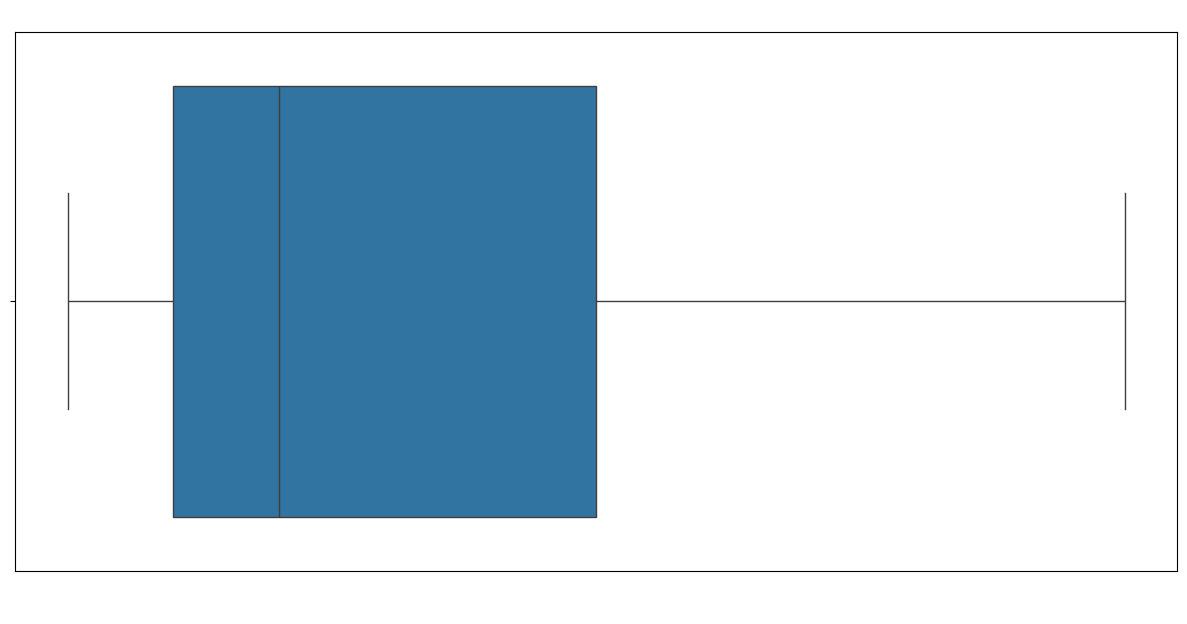

In [37]:
#Validating the changes
plt.figure(figsize=(15,7))
NumberOfAddress_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['NumberOfAddress'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('NumberOfAddress Values', color='white')
NumberOfAddress_ax.set_title('Finding outliers in NumberOfAddress column',color= 'white')
plt.show()

In [38]:
#column: CouponUsed
OnlineRetail['CouponUsed'].value_counts() #Figuring out if there are extreme values

CouponUsed
1.0     1770
2.0     1180
0.0      755
3.0      313
4.0      179
5.0      118
6.0       99
7.0       80
8.0       39
10.0      13
9.0       12
11.0      11
12.0       9
13.0       8
14.0       4
16.0       2
Name: count, dtype: int64

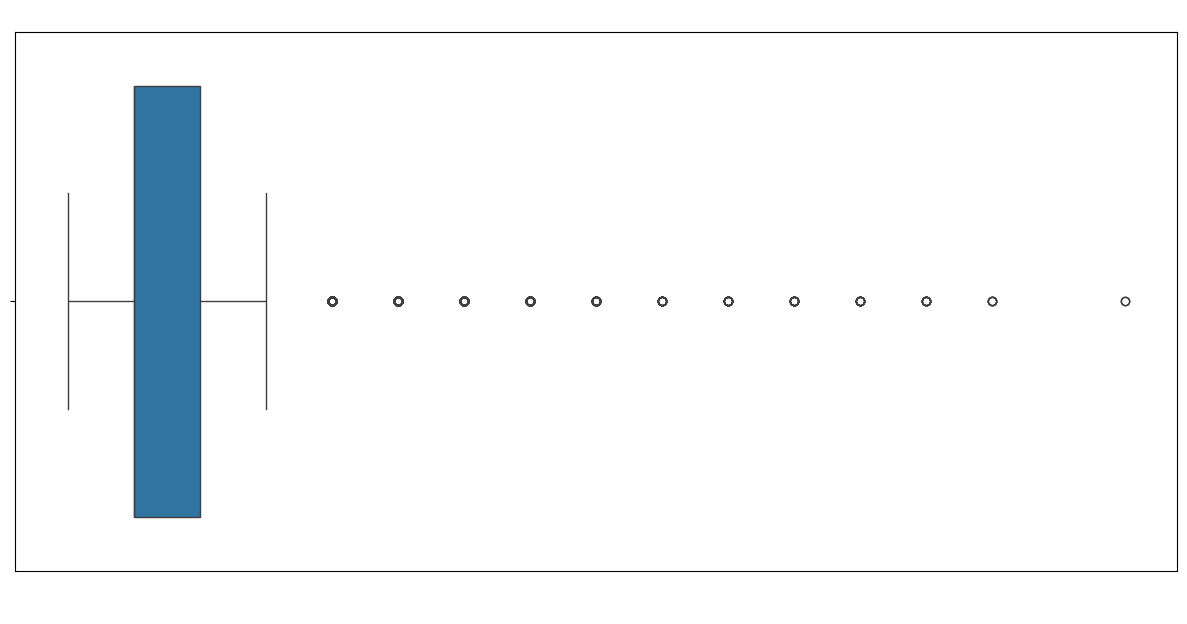

In [39]:
#Detecting outliers in CouponUsed Column
plt.figure(figsize=(15,7))
CouponUsed_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['CouponUsed'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('CouponUsed Values', color='white')
CouponUsed_ax.set_title('Finding outliers in CouponUsed column',color= 'white')
plt.show()

In [40]:
#column: DaySinceLastOrder
OnlineRetail['DaySinceLastOrder'].value_counts() #Figuring Out if there are extreme values.

DaySinceLastOrder
3.0     809
2.0     613
1.0     542
8.0     488
7.0     383
4.0     378
0.0     296
9.0     280
5.0     212
10.0    153
6.0     100
11.0     85
12.0     67
13.0     47
14.0     33
17.0     17
15.0     16
16.0     13
18.0     10
30.0      1
46.0      1
31.0      1
Name: count, dtype: int64

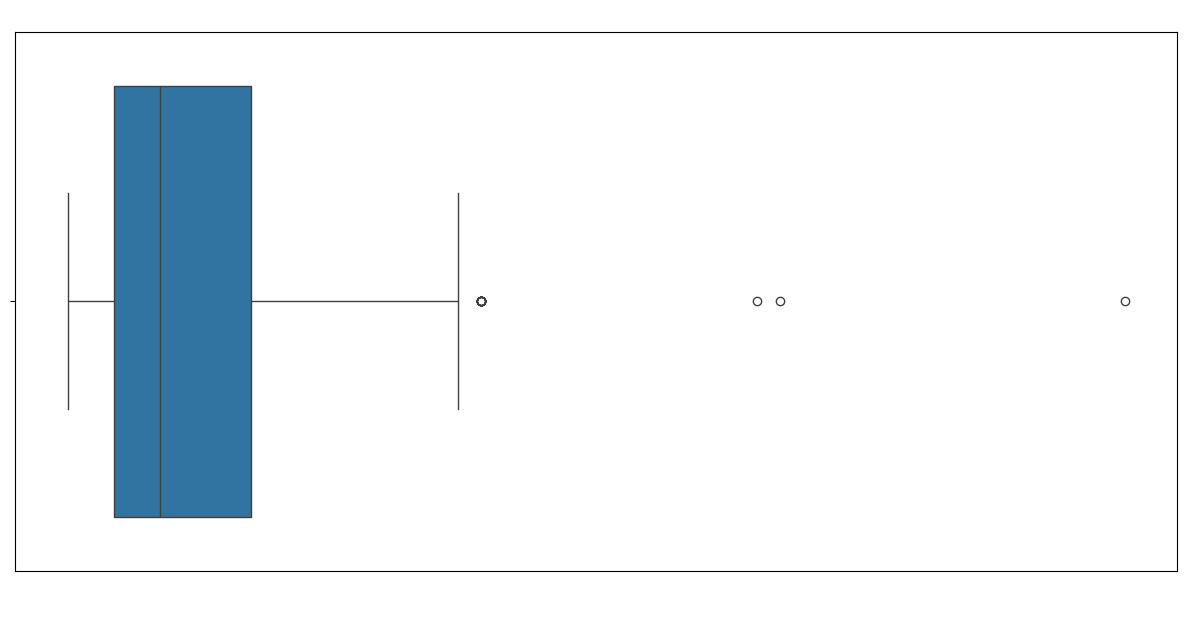

In [41]:
#There are outliers yet since the column represents Recency of order then the outliers provide a relevant information and hence it is not problematic to leave them.
plt.figure(figsize=(15,7))
DaySinceLastOrder_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['DaySinceLastOrder'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('DaySinceLastOrder Values', color='white')
DaySinceLastOrder_ax.set_title('Finding outliers in DaySinceLastOrder column',color= 'white')
plt.show()

In [42]:
#column: Churn
OnlineRetail['Churn'].value_counts() #Figuring Out if there are extreme values.

Churn
0    4107
1     728
Name: count, dtype: int64

In [43]:
#column: CityTier
OnlineRetail['CityTier'].value_counts() #Figuring Out if there are extreme values.

CityTier
1    3086
3    1546
2     203
Name: count, dtype: int64

In [44]:
#column: HoursSpendOnApp
OnlineRetail['HourSpendOnApp'].value_counts() #Figuring Out if there are extreme values.

HourSpendOnApp
3.0    2330
2.0    1130
4.0    1101
1.0      32
5.0       3
0.0       2
Name: count, dtype: int64

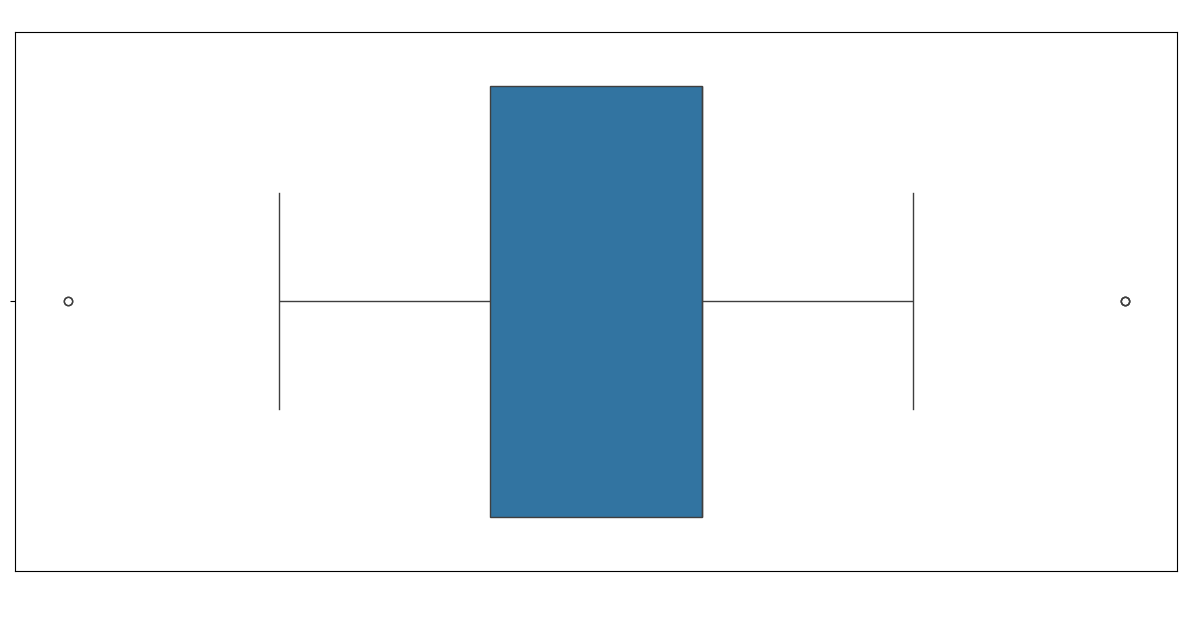

In [45]:
#Visualizing outliers using BoxPlot
plt.figure(figsize=(15,7))
HoursSpendOnApp_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['HourSpendOnApp'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('HoursSpendOnApp Values', color='white')
HoursSpendOnApp_ax.set_title('Finding outliers in HoursSpendOnApp column',color= 'white')
plt.show()

In [46]:
#Handling outliers
OnlineRetail = OnlineRetail[OnlineRetail['HourSpendOnApp'] > 0.0]
OnlineRetail = OnlineRetail[OnlineRetail['HourSpendOnApp'] < 5.0]

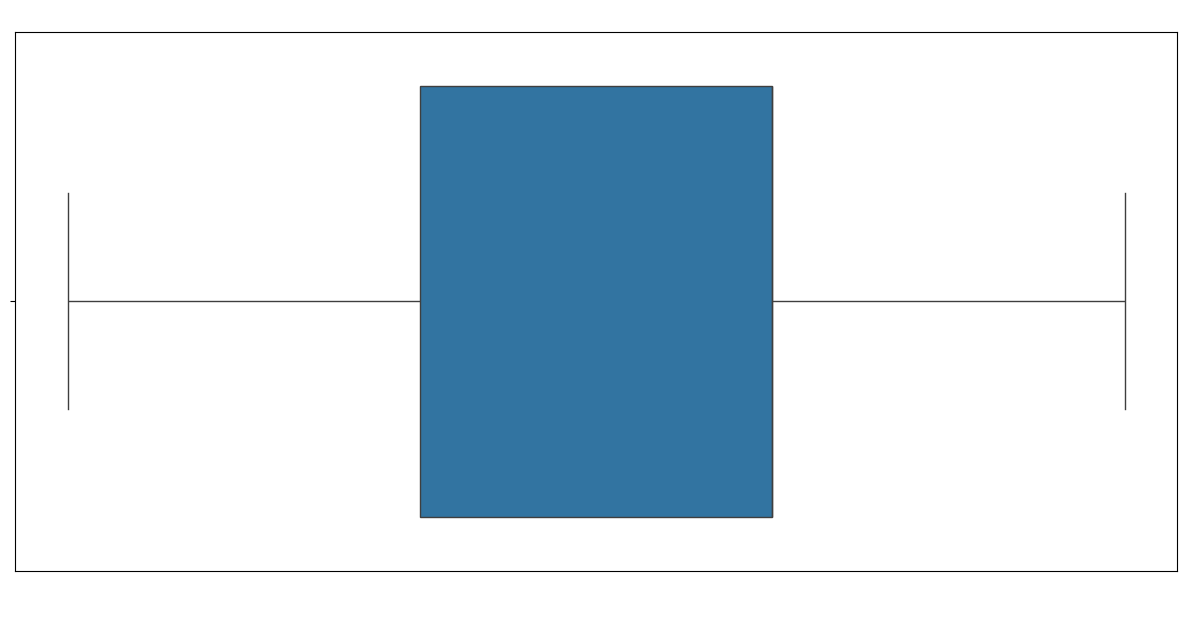

In [47]:
#Validating the changes
plt.figure(figsize=(15,7))
HoursSpendOnApp_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['HourSpendOnApp'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('HoursSpendOnApp Values', color='white')
HoursSpendOnApp_ax.set_title('Finding outliers in HoursSpendOnApp column',color= 'white')
plt.show()

In [48]:
#column: NumberOfDeviveRegistered
OnlineRetail['NumberOfDeviceRegistered'].value_counts() #Figuring Out if there are extreme values.

NumberOfDeviceRegistered
4.0    1961
3.0    1140
5.0     775
2.0     239
1.0     156
6.0     150
Name: count, dtype: int64

In [49]:
#column: Complain
OnlineRetail['Complain'].value_counts() #Figuring Out if there are extreme values.

Complain
0    3285
1    1308
Name: count, dtype: int64

In [50]:
#column: OrderAmountHikeFromlastYear
OnlineRetail['OrderAmountHikeFromlastYear'].value_counts() #Figuring Out if there are extreme values.

OrderAmountHikeFromlastYear
14.0    610
12.0    596
13.0    585
15.0    472
11.0    280
16.0    260
18.0    259
19.0    259
17.0    248
20.0    191
21.0    159
22.0    147
23.0    119
24.0     67
25.0     59
26.0     32
Name: count, dtype: int64

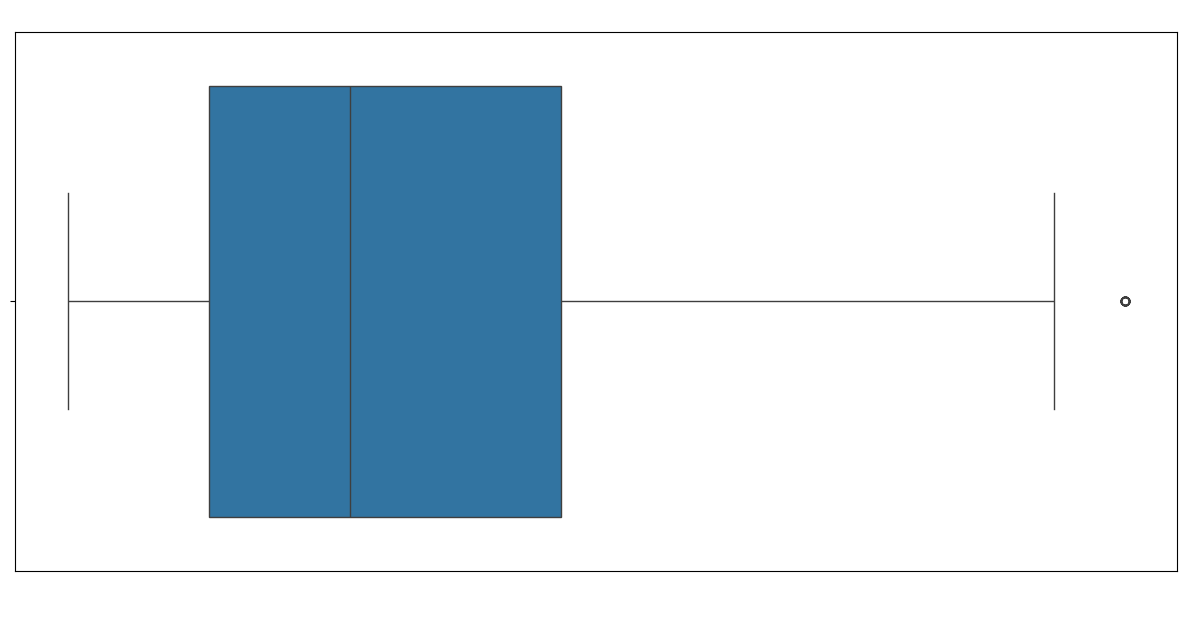

In [51]:
plt.figure(figsize=(15,7))
OrderAmountHikeFromlastYear_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['OrderAmountHikeFromlastYear'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('OrderAmountHikeFromlastYear Values', color='white')
OrderAmountHikeFromlastYear_ax.set_title('Finding outliers in OrderAmountHikeFromlastYear column',color= 'white')
plt.show()
#Since this column presents the increase percentage, Outliers is not problematic in this case

In [52]:
#column: CashbackAmount
OnlineRetail['CashbackAmount'].value_counts().sort_index() #Figuring Out if there are extreme values.

CashbackAmount
0.00      4
12.00     1
25.00     4
37.00     1
56.00     1
         ..
323.59    2
324.26    2
324.43    2
324.73    2
324.99    2
Name: count, Length: 2234, dtype: int64

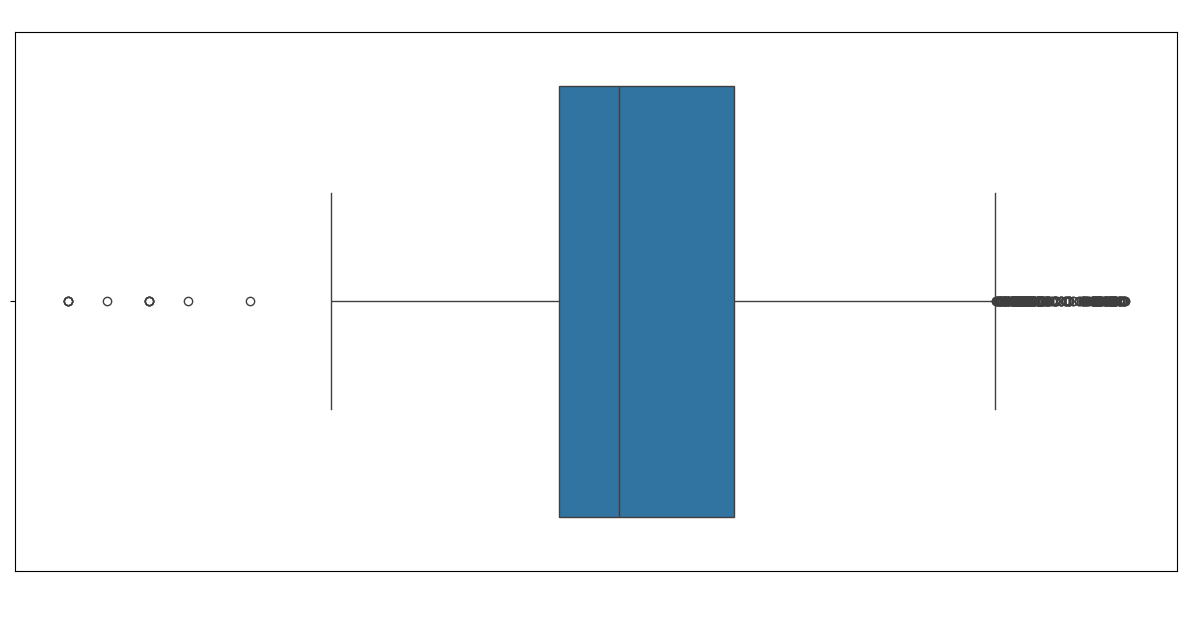

In [53]:
#Detecting outliers in CashbackAmount
plt.figure(figsize=(15,7))
CashbackAmount_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['CashbackAmount'])
plt.tick_params(axis='x', colors='white')
plt.xlabel('CashbackAmount Values', color='white')
CashbackAmount_ax.set_title('Finding outliers in CashbackAmount column',color= 'white')
plt.show()

Handling / Figuring out null values and wrong values

In [54]:
OnlineRetail.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                          85
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode           170
Gender                           0
HourSpendOnApp                   0
NumberOfDeviceRegistered       172
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                  155
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    250
CouponUsed                     243
OrderCount                     247
DaySinceLastOrder              290
CashbackAmount                   0
dtype: int64

In [55]:
OnlineRetail.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered       float64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [56]:
#column: Churn
OnlineRetail['Churn'].unique()

array([1, 0])

In [57]:
#column: Tenure
OnlineRetail['Tenure'].unique()

array([ 4.,  0., 11.,  9., 19., 20., 14.,  8.,  5., 30., 13., 23.,  3.,
       18., 29., 26., 28.,  7., 24., 25., 10., 15., nan, 22.,  1., 27.,
        2., 16., 12.,  6., 21., 17., 31.])

In [58]:
#column: PrefferedLoginDevice
OnlineRetail['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Computer', '0', 'Phone'], dtype=object)

In [59]:
#Handling 0 value in PreferredLoginDevice
OnlineRetail['PreferredLoginDevice'].replace('0','Other',inplace=True)
OnlineRetail['PreferredLoginDevice'].replace('Phone','Mobile Phone',inplace=True)

In [60]:
#column: CityTier
OnlineRetail['CityTier'].unique()

array([3, 1, 2])

In [61]:
#column: WarehouseToHome
OnlineRetail['WarehouseToHome'].unique()

array([ 6., 22., 18., 11., 15., 13., 20., 12., 29., 26., 14., 10., 30.,
       17.,  8., 19.,  9., 27., 35., 24., 16., 33., 32., 23., 28., 31.,
       34.,  5., 25., 21.,  7., 36.])

In [62]:
#column: PrefferedPaymentMode
OnlineRetail['PreferredPaymentMode'].unique()

array(['Debit Card', 'Cash on Delivery', 'COD', 'CC', 'Credit Card',
       'E wallet', nan, 'UPI'], dtype=object)

In [63]:
#Handling 'COD' and 'CC' values
OnlineRetail['PreferredPaymentMode'].replace('COD','Cash on Delivery', inplace=True) #Replacing COD with Cash On Delivery
OnlineRetail['PreferredPaymentMode'].replace('CC','Credit Card', inplace=True) #Replacing CC with Credit Card
OnlineRetail['PreferredPaymentMode'].fillna(value='Other', inplace=True) #Replacing nan with Other

In [64]:
#column: Gender
OnlineRetail['Gender'].unique()

array(['Female', 'Male', 'f', 'm'], dtype=object)

In [65]:
#Handling 'f' and 'm' value in Gender
OnlineRetail['Gender'].replace('f','Female',inplace=True)
OnlineRetail['Gender'].replace('m','Male',inplace=True)

In [66]:
#column: HourSpendOnApp
OnlineRetail['HourSpendOnApp'].unique()

array([3., 2., 1., 4.])

In [67]:
#column: NumberOfDeviceRegistered
OnlineRetail['NumberOfDeviceRegistered'].unique()

array([ 3.,  5.,  4., nan,  2.,  1.,  6.])

In [68]:
#column: PreferedOrderCat
OnlineRetail['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Others', 'Fashion',
       'Mobile', 'Grocery'], dtype=object)

In [69]:
#Handling 'Mobile' value in PreferedOrderCat
OnlineRetail['PreferedOrderCat'].replace('Mobile','Mobile Phone',inplace=True)

In [70]:
#column: SatisfactionScore
OnlineRetail['SatisfactionScore'].unique()

array([2, 5, 3, 4, 1])

In [71]:
#column: NumberOfAddress
OnlineRetail['NumberOfAddress'].unique()

array([ 9,  2, 10,  1,  5,  4,  3,  8,  6,  7, 11])

In [72]:
#column: Complain
OnlineRetail['Complain'].unique()

array([1, 0])

In [73]:
#column: OrderAmountHikeFromlastYear
OnlineRetail['OrderAmountHikeFromlastYear'].unique()

array([11., 22., nan, 13., 17., 16., 24., 18., 12., 15., 14., 20., 25.,
       23., 19., 21., 26.])

In [74]:
#column: CouponUsed
OnlineRetail['CouponUsed'].unique()

array([ 1.,  4.,  9.,  0.,  2.,  6., 11., nan,  7., 12., 10.,  5.,  3.,
       13.,  8., 14., 16.])

In [75]:
#column: OrderCount
OnlineRetail['OrderCount'].unique()

array([ 1.,  6., 15.,  2.,  4.,  7.,  3.,  9., nan, 11.,  5., 12.,  8.,
       13., 10., 14., 16.])

In [76]:
#column: DaySinceLastOrder
OnlineRetail['DaySinceLastOrder'].unique()

array([ 5.,  7.,  8.,  0.,  2.,  3.,  6.,  4., 11.,  1.,  9., 15., nan,
       13., 12., 10., 16., 17., 14., 30., 46., 18., 31.])

In [77]:
#column: CashbackAmount
OnlineRetail['CashbackAmount'].unique()

array([159.93, 139.19, 295.45, ..., 173.78, 159.82, 172.87])

Feature Engineering: One Hot Encoding

In [78]:
#Turning Nominal Object columns into seperate columns
OneHot_Columns = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']
OnlineRetail = pd.get_dummies(OnlineRetail, columns= OneHot_Columns)

In [79]:
OnlineRetail.columns #Validating the changes

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone',
       'PreferredLoginDevice_Other', 'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_Other',
       'PreferredPaymentMode_UPI', 'Gender_Female', 'Gender_Male',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

Handling nulls

In [80]:
#Dropping nulls
OnlineRetail_NoNull = OnlineRetail.copy()
OnlineRetail_NoNull.dropna(inplace=True)

In [81]:
# Check the column names and their data types
print(OnlineRetail.dtypes)

# Check if 'Satisfaction Score' is present in the DataFrame
print('Satisfaction Score' in OnlineRetail.columns)

CustomerID                                 int64
Churn                                      int64
Tenure                                   float64
CityTier                                   int64
WarehouseToHome                          float64
HourSpendOnApp                           float64
NumberOfDeviceRegistered                 float64
SatisfactionScore                          int64
NumberOfAddress                            int64
Complain                                   int64
OrderAmountHikeFromlastYear              float64
CouponUsed                               float64
OrderCount                               float64
DaySinceLastOrder                        float64
CashbackAmount                           float64
PreferredLoginDevice_Computer               bool
PreferredLoginDevice_Mobile Phone           bool
PreferredLoginDevice_Other                  bool
PreferredPaymentMode_Cash on Delivery       bool
PreferredPaymentMode_Credit Card            bool
PreferredPaymentMode

In [82]:
# Selecting only numeric columns
numeric_columns = OnlineRetail.select_dtypes(include=[np.number])

# Assuming 'Satisfaction Score' is your target column and you want to exclude it from the features
X = numeric_columns.drop(columns=['SatisfactionScore'])

KMeans

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Drop non-numeric columns that are not needed for clustering
X = OnlineRetail.drop(['CustomerID', 'Churn'], axis=1)

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Instantiate KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit KMeans to the imputed training data
kmeans.fit(X_train_imputed)

# Get cluster labels for training data
train_cluster_labels = kmeans.labels_

# Add cluster labels as a new column in the training set
X_train['ChurnCluster'] = train_cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [84]:
# Transform the testing data using the same imputer that was fit on the training data
X_test_imputed = imputer.transform(X_test)

# Predict cluster labels for the testing data
test_cluster_labels = kmeans.predict(X_test_imputed)

# Add cluster labels as a new column in the testing set
X_test['ChurnCluster'] = test_cluster_labels

In [85]:
from sklearn.metrics import silhouette_score

# Analyze cluster characteristics
cluster_means = X_train.groupby('ChurnCluster').mean()
print(cluster_means)

# Evaluate clustering performance
silhouette_avg = silhouette_score(X_train_imputed, train_cluster_labels)
print("Silhouette Score:", silhouette_avg)

                 Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
ChurnCluster                                                         
0              8.770768  1.721649        15.905498        2.980756   
1             17.593668  1.595550        15.424084        3.000000   

              NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
ChurnCluster                                                                 
0                             3.758954           3.036426         4.202749   
1                             3.850606           3.092932         4.977749   

              Complain  OrderAmountHikeFromlastYear  CouponUsed  ...  \
ChurnCluster                                                     ...   
0             0.285567                    15.764948    1.761512  ...   
1             0.303665                    15.797535    2.660870  ...   

              Gender_Female  Gender_Male  PreferedOrderCat_Fashion  \
ChurnCluster                                   

In [86]:
# Print cluster predictions for the training set
print("Training Set - Cluster Predictions:")
print(X_train['ChurnCluster'].values)

# Print cluster predictions for the testing set
print("\nTesting Set - Cluster Predictions:")
print(X_test['ChurnCluster'].values)

Training Set - Cluster Predictions:
[0 1 0 ... 0 0 0]

Testing Set - Cluster Predictions:
[0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0

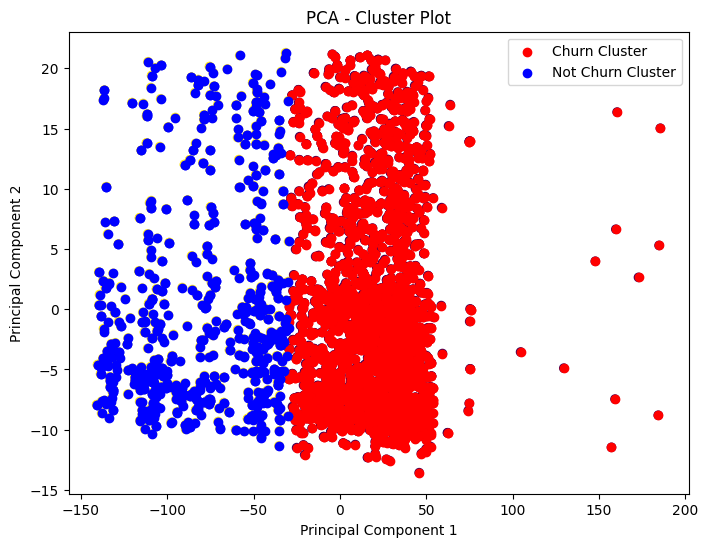

In [87]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_imputed)

# Plot the clusters with meaningful labels
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_cluster_labels, cmap='viridis')
plt.title('PCA - Cluster Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Get cluster characteristics (mean values of features)
cluster_means = X_train.groupby('ChurnCluster').mean()

# Compare with churn and not churn groups in dataset
if cluster_means.loc[0, 'SatisfactionScore'] < cluster_means.loc[1, 'SatisfactionScore']:
    churn_cluster = 0
    not_churn_cluster = 1
else:
    churn_cluster = 1
    not_churn_cluster = 0

# Add labels for the clusters
plt.scatter(X_train_pca[train_cluster_labels == churn_cluster, 0],
            X_train_pca[train_cluster_labels == churn_cluster, 1],
            c='red', label='Churn Cluster')
plt.scatter(X_train_pca[train_cluster_labels == not_churn_cluster, 0],
            X_train_pca[train_cluster_labels == not_churn_cluster, 1],
            c='blue', label='Not Churn Cluster')

# Add legend
plt.legend()

plt.show()

In [88]:
# Get the inertia of the KMeans model
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 2925207.450579872


Combine dataset

In [89]:
# Combine cluster predictions from training and testing sets
OnlineRetail['ChurnCluster'] = np.concatenate((train_cluster_labels, test_cluster_labels))

# Display the updated dataset with cluster predictions
print(OnlineRetail.head())

    CustomerID  Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0        50001      1     4.0         3              6.0             3.0   
5        50006      1     0.0         1             22.0             3.0   
10       50011      1     4.0         1             18.0             2.0   
11       50012      1    11.0         1              6.0             3.0   
12       50013      1     0.0         1             11.0             2.0   

    NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                        3.0                  2                9         1   
5                        5.0                  5                2         1   
10                       3.0                  3                2         0   
11                       4.0                  3               10         1   
12                       3.0                  3                2         1   

    ...  Gender_Male  PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  

In [90]:
# Check for null values in the 'ChurnCluster' column
null_count = OnlineRetail['ChurnCluster'].isnull().sum()

# Print the number of null values
print("Number of null values in 'ChurnCluster' column:", null_count)

Number of null values in 'ChurnCluster' column: 0


Handling null

In [91]:
#Dropping nulls
OnlineRetail_NoNull = OnlineRetail.copy()
OnlineRetail_NoNull.dropna(inplace=True)

Gradient Boosting model

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)
y = OnlineRetail_NoNull['Churn']
X = OnlineRetail_NoNull.drop(['Churn'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Define different values for n_estimators and max_depth
n_estimators_values = [100, 300, 500]
max_depth_values = [3, 5, 7]

# Results dictionary to store accuracy for each combination
results = {}

# Iterate through different hyperparameter values
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Create and train a GradientBoostingClassifier
        gb = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        gb.fit(X_train, y_train)

        # Make predictions on the training set
        gb_pred_train = gb.predict(X_train)

        # Make predictions on the testing set
        gb_pred_test = gb.predict(X_test)

        # Calculate and print the accuracy
        train_accuracy = accuracy_score(y_train, gb_pred_train)
        test_accuracy = accuracy_score(y_test, gb_pred_test)

        # Store the results in the dictionary
        results[(n_estimators, max_depth)] = test_accuracy

        # Print the results for each combination
        print(f'n_estimators={n_estimators}, max_depth={max_depth}')
        print(f'Training Accuracy: {train_accuracy:.4f}')
        print(f'Testing Accuracy: {test_accuracy:.4f}')
        print('---')

# Find the best hyperparameter combination
best_params = max(results, key=results.get)
best_accuracy = results[best_params]

print(f'\nBest Hyperparameters: {best_params}')
print(f'Accuracy of the best model on testing set: {best_accuracy:.4f}')

n_estimators=100, max_depth=3
Training Accuracy: 0.9463
Testing Accuracy: 0.9405
---
n_estimators=100, max_depth=5
Training Accuracy: 0.9948
Testing Accuracy: 0.9568
---
n_estimators=100, max_depth=7
Training Accuracy: 1.0000
Testing Accuracy: 0.9673
---
n_estimators=300, max_depth=3
Training Accuracy: 0.9803
Testing Accuracy: 0.9449
---
n_estimators=300, max_depth=5
Training Accuracy: 1.0000
Testing Accuracy: 0.9702
---
n_estimators=300, max_depth=7
Training Accuracy: 1.0000
Testing Accuracy: 0.9732
---
n_estimators=500, max_depth=3
Training Accuracy: 0.9978
Testing Accuracy: 0.9524
---
n_estimators=500, max_depth=5
Training Accuracy: 1.0000
Testing Accuracy: 0.9747
---
n_estimators=500, max_depth=7
Training Accuracy: 1.0000
Testing Accuracy: 0.9762
---

Best Hyperparameters: (500, 7)
Accuracy of the best model on testing set: 0.9762


In [93]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Set specific values for hyperparameters
n_estimators_value = 500
max_depth_value = 7

gb_model = GradientBoostingClassifier(
    n_estimators=n_estimators_value,
    max_depth=max_depth_value,
    random_state=0
)

gb_model.fit(X_train, y_train)

# Make final predictions on the testing set using the trained model
final_predictions = gb_model.predict(X_test)

# Evaluate metrics of the final model on the testing set
accuracy_final = accuracy_score(y_test, final_predictions)
precision_final = precision_score(y_test, final_predictions)
recall_final = recall_score(y_test, final_predictions)
f1_final = f1_score(y_test, final_predictions)

# Print the metrics for the specific hyperparameter values
print(f'\nMetrics for n_estimators={n_estimators_value}, max_depth={max_depth_value}:')
print(f'Accuracy={accuracy_final:.4f}, Precision={precision_final:.4f}, Recall={recall_final:.4f}, F1 Score={f1_final:.4f}')


Metrics for n_estimators=500, max_depth=7:
Accuracy=0.9762, Precision=0.9615, Recall=0.8929, F1 Score=0.9259


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Print the classification report
classification_rep = classification_report(y_test, final_predictions)
print('Classification Report:\n', classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       560
           1       0.96      0.89      0.93       112

    accuracy                           0.98       672
   macro avg       0.97      0.94      0.96       672
weighted avg       0.98      0.98      0.98       672



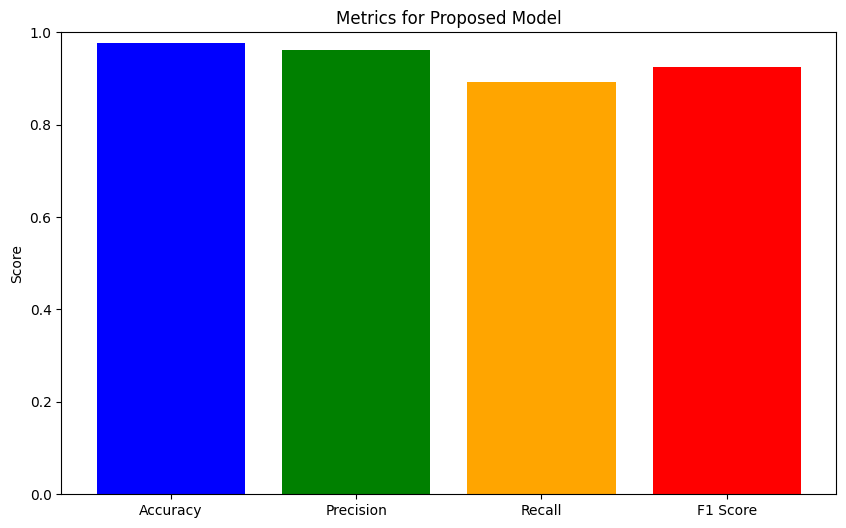

In [95]:
# Plotting the metrics
plt.figure(figsize=(10, 6))

# Bar plot for accuracy, precision, recall, and F1-score
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy_final, precision_final, recall_final, f1_final]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)
plt.title('Metrics for Proposed Model')
plt.ylabel('Score')
plt.show()

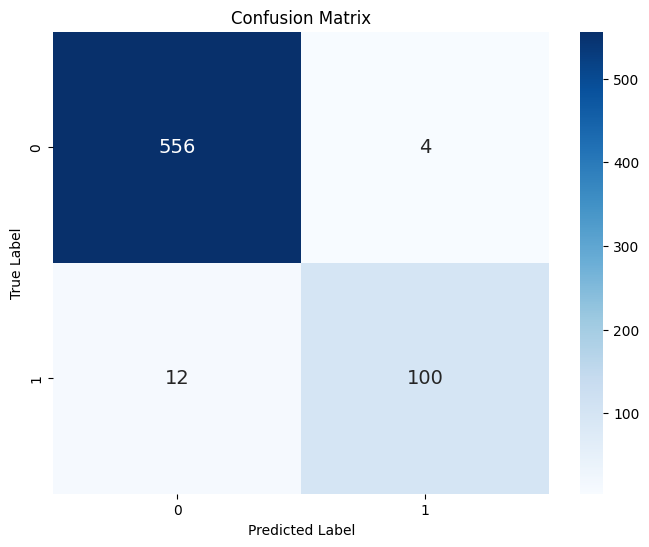

In [96]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))

conf_matrix = confusion_matrix(y_test, final_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Personalization

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df2 = pd.read_csv("/content/drive/MyDrive/FYP/FYP dataset/Womens Clothing E-Commerce Reviews.csv", index_col=0)

In [98]:
df2.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [99]:
pd.DataFrame.info(df2)

<class 'pandas.core.frame.DataFrame'>
Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [100]:
reviewsDf = df2[["Rating","Review Text", "Clothing ID", "Class Name"]]

In [101]:
reviewsDf.head()

,Rating,Review Text,Clothing ID,Class Name
0,4,Absolutely wonderful - silky and sexy and comf...,767,Intimates
1,5,Love this dress! it's sooo pretty. i happene...,1080,Dresses
2,3,I had such high hopes for this dress and reall...,1077,Dresses
3,5,"I love, love, love this jumpsuit. it's fun, fl...",1049,Pants
4,5,This shirt is very flattering to all due to th...,847,Blouses


In [102]:
pd.DataFrame.info(reviewsDf)

<class 'pandas.core.frame.DataFrame'>
Index: 23486 entries, 0 to 23485
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rating       23486 non-null  int64 
 1   Review Text  22641 non-null  object
 2   Clothing ID  23486 non-null  int64 
 3   Class Name   23472 non-null  object
dtypes: int64(2), object(2)
memory usage: 917.4+ KB


In [103]:
reviewsDf = reviewsDf.dropna(subset=['Review Text'])

In [104]:
reviewsDf.index = pd.Series(list(range(reviewsDf.shape[0])))

In [105]:
reviewsDf.head()

,Rating,Review Text,Clothing ID,Class Name
0,4,Absolutely wonderful - silky and sexy and comf...,767,Intimates
1,5,Love this dress! it's sooo pretty. i happene...,1080,Dresses
2,3,I had such high hopes for this dress and reall...,1077,Dresses
3,5,"I love, love, love this jumpsuit. it's fun, fl...",1049,Pants
4,5,This shirt is very flattering to all due to th...,847,Blouses


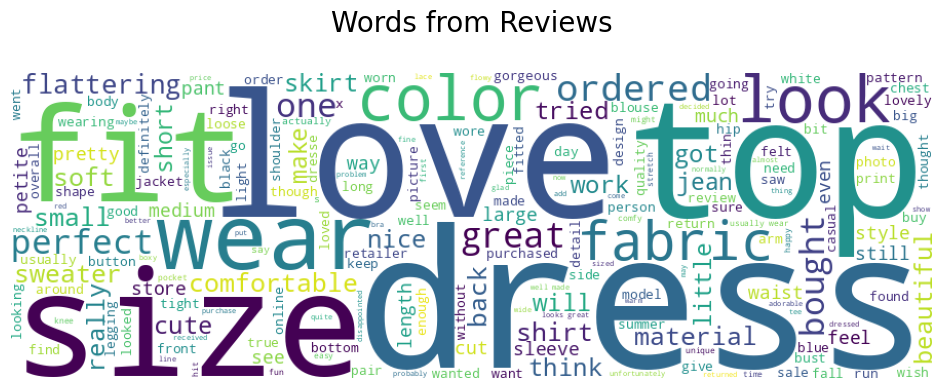

In [106]:
rev = reviewsDf['Review Text']

plt.subplots(figsize=(15,4))
wordcloud = WordCloud(background_color='white', width=900, height=300).generate(" ".join(rev))
plt.imshow(wordcloud)
plt.title('Words from Reviews\n',size=20)
plt.axis('off')
plt.show()

Preprocessing

In [107]:
#Removing stop words.
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('stopwords')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
!pip install nltk --upgrade
nltk.download('wordnet')

sw = set(stopwords.words('english'))

def preproc(data):
    #converting all to lowercase
    data = data.lower()
    #Tokenize
    words = RegexpTokenizer(r'[a-z]+').tokenize(data)
    #Deleting stopwords
    words = [w for w in words if not w in sw]

    #Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [WordNetLemmatizer().lemmatize(x, pos) for x in words]
    return " ".join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [108]:
reviewsDf['New Text'] = reviewsDf['Review Text'].apply(preproc)

In [109]:
reviewsDf.head()

,Rating,Review Text,Clothing ID,Class Name,New Text
0,4,Absolutely wonderful - silky and sexy and comf...,767,Intimates,absolutely wonderful silky sexy comfortable
1,5,Love this dress! it's sooo pretty. i happene...,1080,Dresses,love dress sooo pretty happen find store glad ...
2,3,I had such high hopes for this dress and reall...,1077,Dresses,high hope dress really want work initially ord...
3,5,"I love, love, love this jumpsuit. it's fun, fl...",1049,Pants,love love love jumpsuit fun flirty fabulous ev...
4,5,This shirt is very flattering to all due to th...,847,Blouses,shirt flat due adjustable front tie perfect le...


In [110]:
def polarity (row):
  if row['Rating'] >= 4:
    return 'Positive'
  if row['Rating'] == 3:
    return 'Neutral'
  if row['Rating'] <= 2:
    return 'Negative'

reviewsDf['Class'] = reviewsDf.apply(lambda row: polarity(row), axis=1)

In [111]:
reviewsDf.head()

,Rating,Review Text,Clothing ID,Class Name,New Text,Class
0,4,Absolutely wonderful - silky and sexy and comf...,767,Intimates,absolutely wonderful silky sexy comfortable,Positive
1,5,Love this dress! it's sooo pretty. i happene...,1080,Dresses,love dress sooo pretty happen find store glad ...,Positive
2,3,I had such high hopes for this dress and reall...,1077,Dresses,high hope dress really want work initially ord...,Neutral
3,5,"I love, love, love this jumpsuit. it's fun, fl...",1049,Pants,love love love jumpsuit fun flirty fabulous ev...,Positive
4,5,This shirt is very flattering to all due to th...,847,Blouses,shirt flat due adjustable front tie perfect le...,Positive


In [112]:
text, classe = reviewsDf["New Text"], reviewsDf["Class"]

In [113]:
text

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happen find store glad ...
2        high hope dress really want work initially ord...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flat due adjustable front tie perfect le...
                               ...                        
22636    happy snag dress great price easy slip flat cu...
22637    remind maternity clothe soft stretchy shiny ma...
22638    fit well top see never would work glad able tr...
22639    buy dress wed summer cute unfortunately fit pe...
22640    dress lovely platinum feminine fit perfectly e...
Name: New Text, Length: 22641, dtype: object

In [114]:
classe

0        Positive
1        Positive
2         Neutral
3        Positive
4        Positive
           ...   
22636    Positive
22637     Neutral
22638     Neutral
22639     Neutral
22640    Positive
Name: Class, Length: 22641, dtype: object

In [115]:
train_text = text[:16980]
test_text = text[16981:22640]
train_classe = classe[:16980]
test_classe = classe[16981:22640]

Feature Extraction

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(encoding='latin-1')
X_train_counts = count_vect.fit_transform(train_text)
X_train_counts.shape

(16980, 8819)

In [117]:
count_vect.vocabulary_.get('dress')

2297

In [118]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(16980, 8819)

Sentiment Analysis by Stacking Model

In [119]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import pandas as pd

# Transform the test_text into tf-idf features
vectorizer = TfidfVectorizer()
vectorizer.fit(train_text)
X_test_tfidf = vectorizer.transform(test_text)

# Transform the train_text into tf-idf features
X_train_tfidf = vectorizer.transform(train_text)

# Define hyperparameters to test
lr_max_iters = [500, 1000, 2000]
gb_n_estimators = [10, 50, 100]

# Store results
results = []

# Train and evaluate the model for each combination of hyperparameters
for lr_max_iter in lr_max_iters:
    for gb_n_estimator in gb_n_estimators:
        # Define the base model
        base_models = [
            ('lr', LogisticRegression(max_iter=lr_max_iter, random_state=42))
        ]

        # Define the meta-model
        meta_model = GradientBoostingClassifier(n_estimators=gb_n_estimator, random_state=42)

        # Create the StackingClassifier
        stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

        # Fit the model on the training data
        stacking_clf.fit(X_train_tfidf, train_classe)

        # Make predictions on the test data
        y_pred = stacking_clf.predict(X_test_tfidf)

        # Evaluate the model
        accuracy = accuracy_score(test_classe, y_pred)

        # Store the result
        results.append({
            'lr_max_iter': lr_max_iter,
            'gb_n_estimator': gb_n_estimator,
            'accuracy': accuracy
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print all the results
print("\nAll Hyperparameter Combinations and Accuracy Results:\n")
for _, row in results_df.iterrows():
    print(f"Parameters: lr_max_iter={row['lr_max_iter']}, gb_n_estimator={row['gb_n_estimator']}, Accuracy: {row['accuracy']:.6f}")

# Identify and print the best hyperparameters
best_result = results_df.loc[results_df['accuracy'].idxmax()]
print(f"\nBest hyperparameters: lr_max_iter={best_result['lr_max_iter']}, gb_n_estimator={best_result['gb_n_estimator']}, Accuracy: {best_result['accuracy']:.6f}")


All Hyperparameter Combinations and Accuracy Results:

Parameters: lr_max_iter=500.0, gb_n_estimator=10.0, Accuracy: 0.814985
Parameters: lr_max_iter=500.0, gb_n_estimator=50.0, Accuracy: 0.817812
Parameters: lr_max_iter=500.0, gb_n_estimator=100.0, Accuracy: 0.815515
Parameters: lr_max_iter=1000.0, gb_n_estimator=10.0, Accuracy: 0.814985
Parameters: lr_max_iter=1000.0, gb_n_estimator=50.0, Accuracy: 0.817812
Parameters: lr_max_iter=1000.0, gb_n_estimator=100.0, Accuracy: 0.815515
Parameters: lr_max_iter=2000.0, gb_n_estimator=10.0, Accuracy: 0.814985
Parameters: lr_max_iter=2000.0, gb_n_estimator=50.0, Accuracy: 0.817812
Parameters: lr_max_iter=2000.0, gb_n_estimator=100.0, Accuracy: 0.815515

Best hyperparameters: lr_max_iter=500.0, gb_n_estimator=50.0, Accuracy: 0.817812


Collaborative Filtering by SVD

In [120]:
!pip install scikit-surprise
from surprise import Dataset, Reader, SVD

# Prepare the data for collaborative filtering
reader = Reader(rating_scale=(-1, 1))
data = Dataset.load_from_df(reviewsDf[['New Text', 'Clothing ID', 'Rating']], reader)

# Train the SVD model
trainset = data.build_full_trainset()
svd = SVD()
svd.fit(trainset)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357257 sha256=29fd13eb7130c93f371d1589525d6ea745586274eeff6996d506baed9808041a
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [121]:
import numpy as np
import pandas as pd

# Define the number of top recommendations to generate
N = 3

def adjust_ratings(row):
    if row['Class'] == 'positive':
        return row['Rating'] * 1.2  # Increase weight for positive sentiment
    elif row['Class'] == 'negative':
        return row['Rating'] * 0.8  # Decrease weight for negative sentiment
    else:
        return row['Rating']  # No adjustment for neutral sentiment

# Generate recommendations based on category input
def generate_recommendations(category_preference):
    # Get reviews for the specified category
    category_reviews = reviewsDf[reviewsDf['Class Name'] == category_preference].copy()

    if len(category_reviews) == 0:
        print(f"No items found for the category: {category_preference}")
        return

    top_n_recommendations = []

    # Generate recommendations for each clothing item in the category
    for item_id in category_reviews['Clothing ID'].unique():
        # Get sentiment-adjusted ratings for items with the same item ID
        item_reviews = category_reviews[category_reviews['Clothing ID'] == item_id].copy()
        item_reviews['Adjusted Rating'] = item_reviews.apply(adjust_ratings, axis=1)

        # Calculate the mean adjusted rating for the item
        mean_rating = np.mean(item_reviews['Adjusted Rating'])

        # Add item to recommendations list
        top_n_recommendations.append({'Clothing ID': item_id,
                                      'Rating': mean_rating,
                                      'Review Text': item_reviews.iloc[0]['Review Text']})

    # Convert recommendations list to DataFrame
    top_n_recommendations = pd.DataFrame(top_n_recommendations)

    # Select top N recommendations
    top_n_recommendations = top_n_recommendations.nlargest(N, 'Rating')

    # Print the recommendations
    print("Top Recommendations:")
    for index, item in top_n_recommendations.iterrows():
        print(f"Clothing ID: {item['Clothing ID']}, Rating: {item['Rating']}, Description: {item['Review Text']}")

In [122]:
category_preference = input("Please enter the name of your clothing category preference: ")
generate_recommendations(category_preference)

Please enter the name of your clothing category preference: Dresses
Top Recommendations:
Clothing ID: 1196, Rating: 5.0, Description: This is a great pull over dress that can easily be dressed to wear to work, to a bbq, or to happy hour. i have a large chest which sometimes makes this fit look like a tent but this fabric drapes nicely. the only thing i would note is the neckline was slightly higher on me than for the model.
Clothing ID: 1197, Rating: 5.0, Description: So glad i ordered this dress. it fits true to size and is extra soft. i was unsure about the color, but it looks nicer in person. the fabric is a mid weight that hangs nicely. this will go great with leggings or tights and wear into spring.
Clothing ID: 17, Rating: 5.0, Description: I absolutely love this dress! i got it right after my first baby was born to wear to an outdoor, early october wedding. it was perfect! the fit is flattering and the dress is well made. it's a classy, elegant dress and i have worn it many time